In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from tqdm import tqdm
!pip install GPUtil
import gc
import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

In [2]:
train_features = pd.read_csv("train_features.csv", index_col="id")
test_features = pd.read_csv("test_features.csv", index_col="id")
train_labels = pd.read_csv("train_labels.csv", index_col="id")

In [3]:
#train_features.head()

In [3]:
train_labels.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
species_labels = sorted(train_labels.columns.unique())
#species_labels

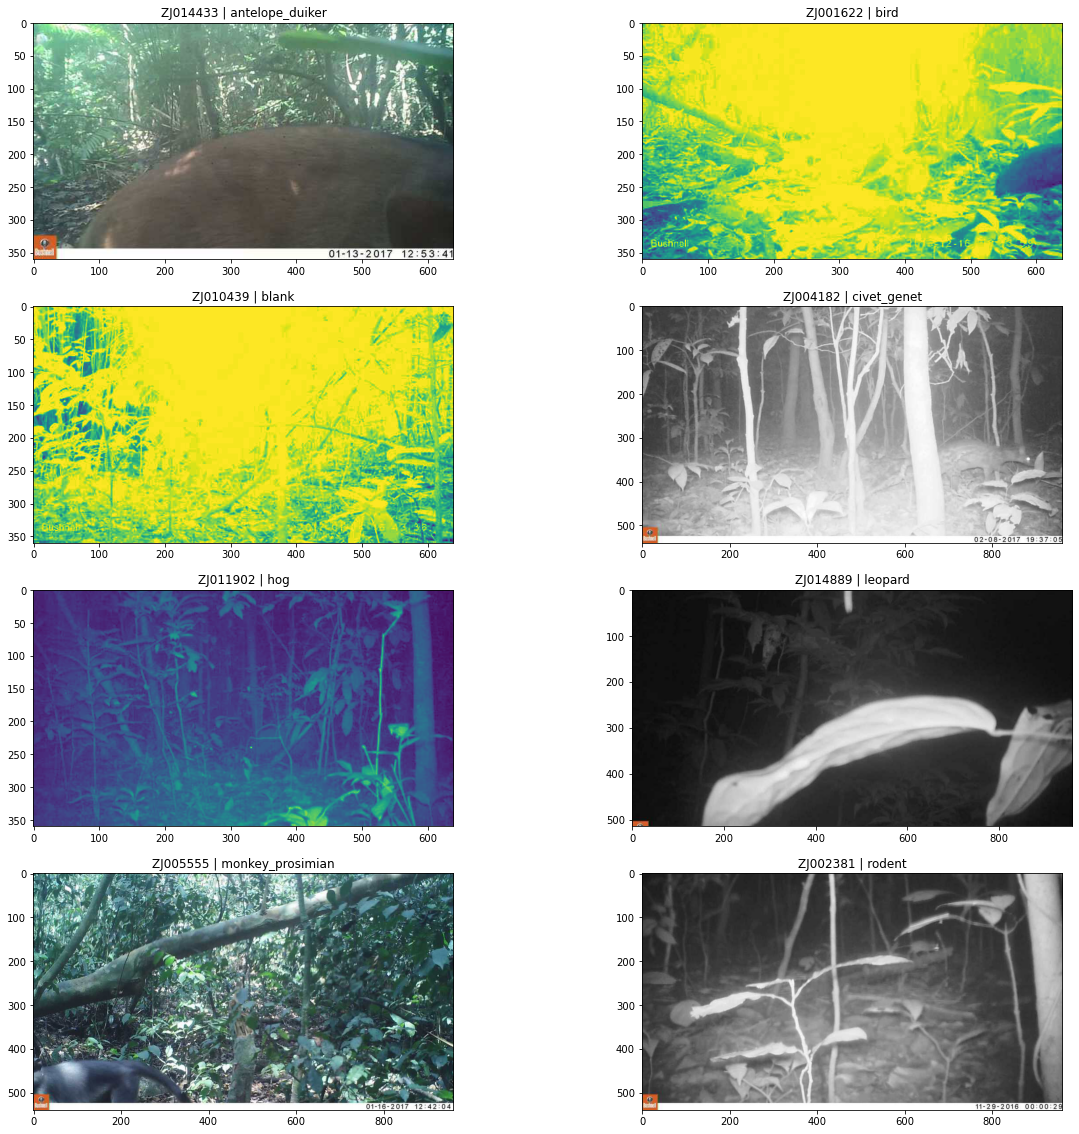

In [6]:
import matplotlib.image as mpimg

random_state = 1#4

# we'll create a grid with 8 positions, one for each label (7 species, plus blanks)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# iterate through each species
for species, ax in zip(species_labels, axes.flat):
    # get an image ID for this species
    img_id = (train_labels[train_labels.loc[:,species] == 1].sample(1, random_state=random_state).index[0])
    # reads the filepath and returns a numpy array
    img = mpimg.imread(train_features.loc[img_id].filepath)
    # plot etc
    ax.imshow(img)
    ax.set_title(f"{img_id} | {species}")
    

In [7]:
from collections import Counter
import collections
sorted_sites = train_features.sort_values(['site'], ascending=False)
sorted_sites.describe()
pocet_uni = sorted_sites["site"].unique()
pocet_sites = pocet_uni.shape[0]

list_of_sites = []
for row in train_features.itertuples(index=False):
    for k,v in enumerate(row):
        konec = v[-3:]
        if konec == "jpg":
            pass
        else:
            list_of_sites.append(konec)
            



a = dict(Counter(list_of_sites))
od = collections.OrderedDict(sorted(a.items()))
# print(od) # serazeny dict site a pocet fotek !!!!
# plt.bar(od.keys(), od.values(), 1, color='g')
# plt.show()
Pomer_fotek_site = []
for key in od:
    pomer = od[key]/train_features.shape[0]
    Pomer_fotek_site.append(pomer)
    
# print(sorted(Pomer_fotek_site))

{'001': [0.0, 11.0, 6.0, 0.0, 0.0, 51.0, 17.0, 0.0], '002': [0.0, 9.0, 36.0, 0.0, 0.0, 0.0, 68.0, 58.0], '003': [6.0, 8.0, 15.0, 0.0, 0.0, 0.0, 27.0, 2.0], '004': [22.0, 39.0, 4.0, 4.0, 0.0, 0.0, 40.0, 0.0], '005': [8.0, 0.0, 7.0, 13.0, 0.0, 0.0, 45.0, 8.0], '006': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0], '007': [1.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0], '008': [8.0, 124.0, 40.0, 73.0, 0.0, 0.0, 52.0, 244.0], '009': [33.0, 155.0, 57.0, 16.0, 188.0, 0.0, 190.0, 25.0], '010': [3.0, 0.0, 12.0, 0.0, 0.0, 0.0, 11.0, 47.0], '013': [28.0, 2.0, 13.0, 6.0, 2.0, 0.0, 34.0, 4.0], '014': [22.0, 0.0, 9.0, 0.0, 157.0, 94.0, 19.0, 12.0], '015': [0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 13.0, 0.0], '016': [5.0, 29.0, 2.0, 19.0, 0.0, 0.0, 4.0, 0.0], '017': [6.0, 0.0, 8.0, 0.0, 0.0, 0.0, 5.0, 0.0], '018': [6.0, 39.0, 29.0, 0.0, 0.0, 0.0, 1.0, 0.0], '019': [1.0, 0.0, 1.0, 9.0, 15.0, 0.0, 6.0, 11.0], '020': [5.0, 16.0, 19.0, 167.0, 0.0, 0.0, 17.0, 21.0], '021': [44.0, 13.0, 26.0, 12.0, 0.0, 27.0, 42.0, 0.0], '022':

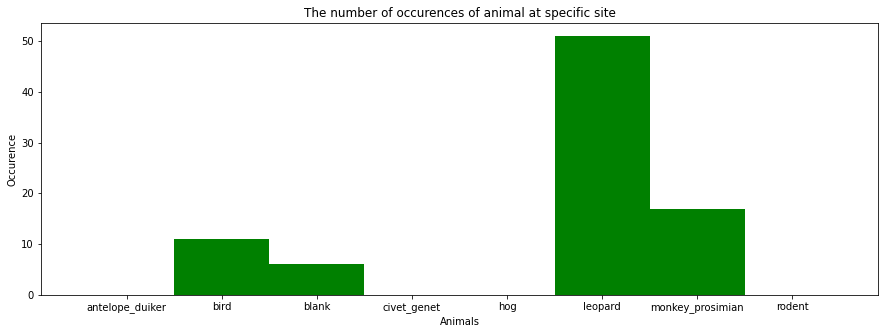

In [8]:
#print(list_of_sites)
animal_on_trap = dict()
counter_zvirat = 0;
counter_cyklu = 0;
b = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
for key, value in od.items():
    animal_on_trap.update({ key : b})


for row in train_labels.itertuples(index=False):
    for a,b in enumerate(row):
        if b == 0.0:
            counter_zvirat = counter_zvirat +1;
        else:
            pom_list = list(animal_on_trap[list_of_sites[counter_cyklu]])
            pom_list[counter_zvirat] = pom_list[counter_zvirat] + 1
            animal_on_trap.update({list_of_sites[counter_cyklu] : pom_list})
            
            counter_zvirat = 0
            counter_cyklu = counter_cyklu + 1
            break
print(animal_on_trap)       #!!!!!!   

species_labels = sorted(train_labels.columns.unique())
print(species_labels)
fig = plt.figure(figsize = (15,5))
plt.bar(species_labels,animal_on_trap['001'], 1, color='g')
plt.xlabel("Animals")
plt.ylabel("Occurence")
plt.title("The number of occurences of animal at specific site")
plt.show()

In [12]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [27]:
list_of_av_brightness_GRAY = []
list_of_av_brightness_RGB = []
list_of_ids = []
barevne_id = []
cernobile_id = []

for row in train_features.itertuples(index=False):
    for k,v in enumerate(row):
        image_ids = v[15:23]
        if image_ids == "":
            pass
        else:
            list_of_ids.append(image_ids)
count_obrazu = 0
for i in range(len(list_of_ids)):
    img = mpimg.imread(train_features.loc[list_of_ids[i]].filepath)
    
    if len(img.shape) == 3:
        gray = rgb2gray(img)
        barevne_id.append(list_of_ids[count_obrazu])
        list_of_av_brightness_RGB.append(gray.ravel().mean()),
    else:
        cernobile_id.append(list_of_ids[count_obrazu])
        list_of_av_brightness_GRAY.append(img.ravel().mean())
#         list_img = img.ravel()
#         for i in range(len(list_img)):
#             brightness_dict.update({ list_img[i] : brightness_dict[list_img[i]] + 1})
        
    count_obrazu = count_obrazu +1

2197


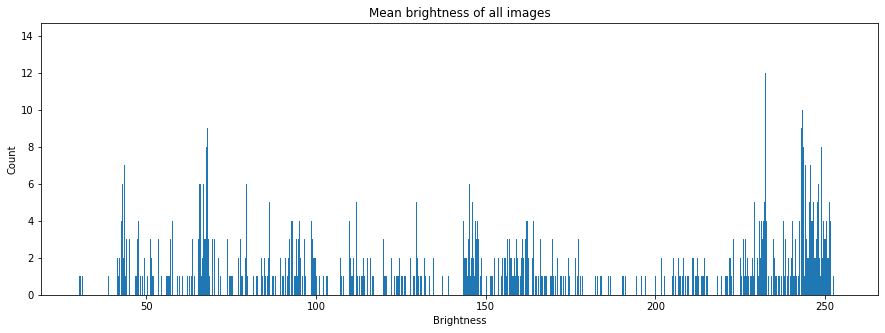

14291


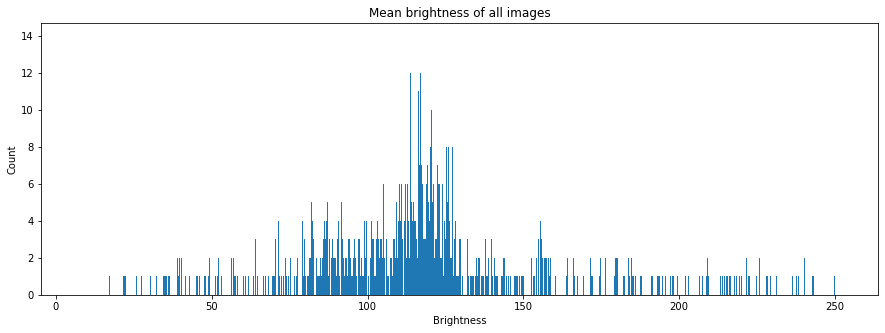

16488


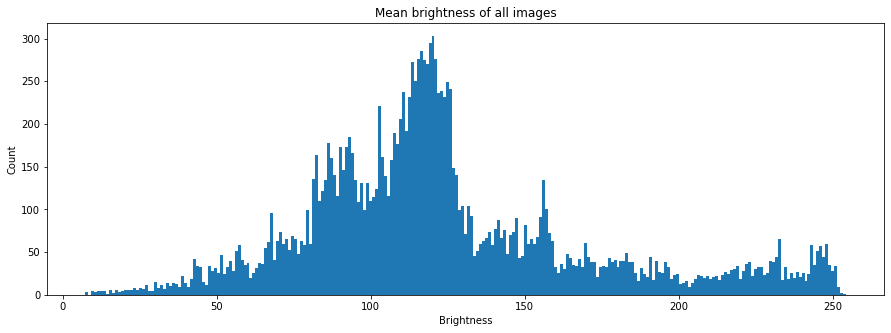

In [34]:
fig = plt.figure(figsize = (15,5))
plt.hist(list_of_av_brightness_GRAY, len(list_of_av_brightness_GRAY))
print(len(list_of_av_brightness_GRAY))
plt.xlabel("Brightness" )
plt.ylabel("Count")
plt.title("Mean brightness of all images")
plt.show()
fig2 = plt.figure(figsize = (15,5))
plt.hist(list_of_av_brightness_RGB , len(list_of_av_brightness_RGB))
print(len(list_of_av_brightness_RGB))
plt.xlabel("Brightness" )
plt.ylabel("Count")
plt.title("Mean brightness of all images")
plt.show()
fig3 = plt.figure(figsize = (15,5))
plt.hist(list_of_av_brightness_RGB +list_of_av_brightness_GRAY, 255)
print(len(list_of_av_brightness_RGB+list_of_av_brightness_GRAY))
plt.xlabel("Brightness" )
plt.ylabel("Count")
plt.title("Mean brightness of all images")
plt.show()

In [9]:
list_of_ids = []
barevne_id = []
cernobile_id = []
pole_vysky = []
pole_sirky = []
list_of_av_brightness_GRAY = []
list_of_av_brightness_R = []
list_of_av_brightness_G = []
list_of_av_brightness_B = []
# brightness_dict = dict()
# n = 255
# lst_bright = []
# for i in range(n+1):
#     lst_bright.append(i)
# for i in range(len(lst_bright)):
#     brightness_dict.update({ i : 0})
         
for row in train_features.itertuples(index=False):
    for k,v in enumerate(row):
        image_ids = v[15:23]
        if image_ids == "":
            pass
        else:
            list_of_ids.append(image_ids)
#print(list_of_ids)
count_obrazu = 0
for i in range(len(list_of_ids)):
    img = mpimg.imread(train_features.loc[list_of_ids[i]].filepath)
    #print(img.shape) # 1. height 2. width
    pole_vysky.append(img.shape[0])
    pole_sirky.append(img.shape[1])
    if len(img.shape) == 3:
        barevne_id.append(list_of_ids[count_obrazu])
        list_of_av_brightness_R.append(img[:,:,0].ravel().mean())
        list_of_av_brightness_G.append(img[:,:,1].ravel().mean())
        list_of_av_brightness_B.append(img[:,:,2].ravel().mean())
    else:
        cernobile_id.append(list_of_ids[count_obrazu])
        list_of_av_brightness_GRAY.append(img.ravel().mean())
#         list_img = img.ravel()
#         for i in range(len(list_img)):
#             brightness_dict.update({ list_img[i] : brightness_dict[list_img[i]] + 1})
        
    count_obrazu = count_obrazu +1




print(sum(list_of_av_brightness_GRAY)/len(list_of_av_brightness_GRAY))
print(sum(list_of_av_brightness_R)/len(list_of_av_brightness_R))
print(sum(list_of_av_brightness_G)/len(list_of_av_brightness_G))
print(sum(list_of_av_brightness_B)/len(list_of_av_brightness_B))
print(len(cernobile_id))
print(len(barevne_id))

157.11000718422247
116.71859320442968
120.75066613336017
118.05776160470609
2197
14291


[0.13324842309558466, 0.8667515769044153]
[1.7777777777777777, 1.9104477611940298, 1.8640776699029127, 1.3333333333333333, 1.6744186046511629, 1.5, 1.6842105263157894]


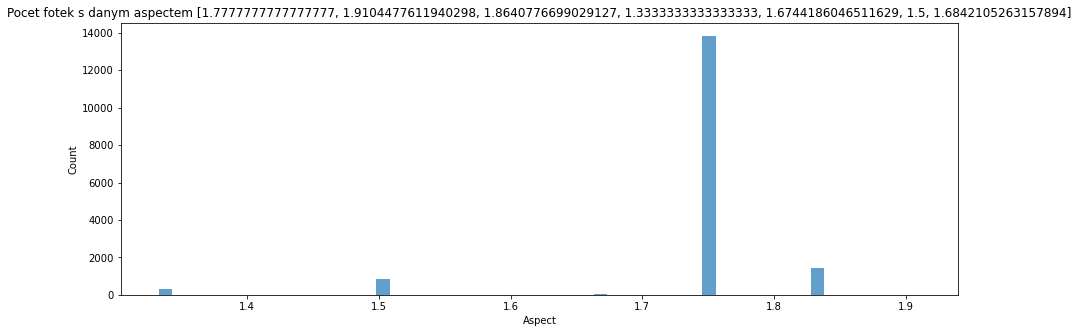

{1.7777777777777777: 13835, 1.9104477611940298: 970, 1.8640776699029127: 458, 1.3333333333333333: 293, 1.6744186046511629: 67, 1.5: 864, 1.6842105263157894: 1}


In [18]:
pocet_images = len(list_of_ids)
Pomer_cerno_bar = []
pomer_stran = []
Pomer_cerno_bar.append(len(cernobile_id)/pocet_images)
Pomer_cerno_bar.append(len(barevne_id)/pocet_images)
print(Pomer_cerno_bar) # !!!!
# aspect - x/y
unique_list_pomer = []
for i in range(len(list_of_ids)):
    pomer_str = pole_sirky[i] / pole_vysky[i]
    pomer_stran.append(pomer_str)
    
for x in pomer_stran:
    if x not in unique_list_pomer:
        unique_list_pomer.append(x)
print(unique_list_pomer) 
#print(pomer_stran) # !!!!

fig = plt.figure(figsize = (15,5))
plt.hist(pomer_stran , len(unique_list_pomer), alpha = 0.7, width = 0.01)
plt.xlabel("Aspect" )
plt.ylabel("Count")
plt.title("Pocet fotek s danym aspectem [1.7777777777777777, 1.9104477611940298, 1.8640776699029127, 1.3333333333333333, 1.6744186046511629, 1.5, 1.6842105263157894]")
plt.show()

pomer_stran_dict = dict()
pomer_stran_dict = dict(Counter(pomer_stran))
print(pomer_stran_dict)  

[540, 360, 335, 515, 120, 215, 240, 95]


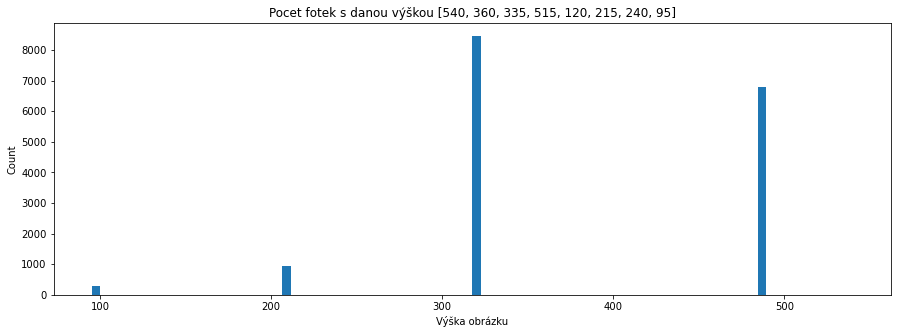

{540: 6345, 360: 7490, 335: 970, 515: 458, 120: 293, 215: 67, 240: 864, 95: 1}
[960, 640, 160, 360]


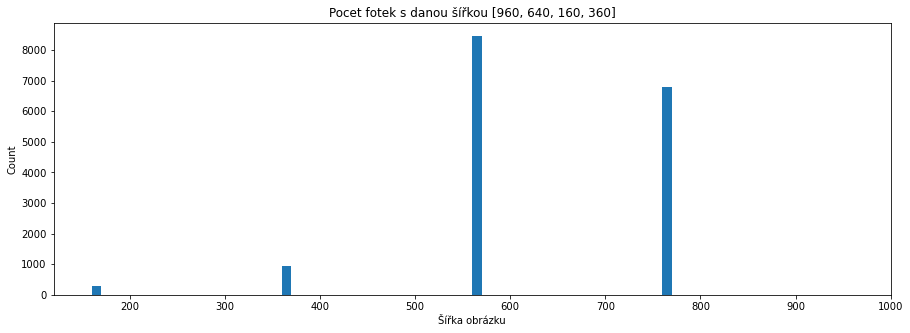

{960: 6803, 640: 8460, 160: 294, 360: 931}


In [15]:
#print(pole_vysky)
unique_list_vyska = []
for x in pole_vysky:
    if x not in unique_list_vyska:
        unique_list_vyska.append(x)
print(unique_list_vyska) 

fig = plt.figure(figsize = (15,5))
plt.hist(pole_vysky , len(unique_list_vyska),width = 5)
plt.xlabel("Výška obrázku" )
plt.ylabel("Count")
plt.title("Pocet fotek s danou výškou [540, 360, 335, 515, 120, 215, 240, 95]")
plt.show()

pocet_vysky_dict = dict()
pocet_vysky_dict = dict(Counter(pole_vysky))
print(pocet_vysky_dict) 

unique_list_sirka = []
for x in pole_sirky:
    if x not in unique_list_sirka:
        unique_list_sirka.append(x)
print(unique_list_sirka) 

fig = plt.figure(figsize = (15,5))
plt.hist(pole_sirky , len(unique_list_sirka),width = 10)
plt.xlabel("Šířka obrázku" )
plt.ylabel("Count")
plt.title("Pocet fotek s danou šířkou [960, 640, 160, 360]")
plt.show()

pocet_sirky_dict = dict()
pocet_sirky_dict = dict(Counter(pole_sirky))
print(pocet_sirky_dict) 

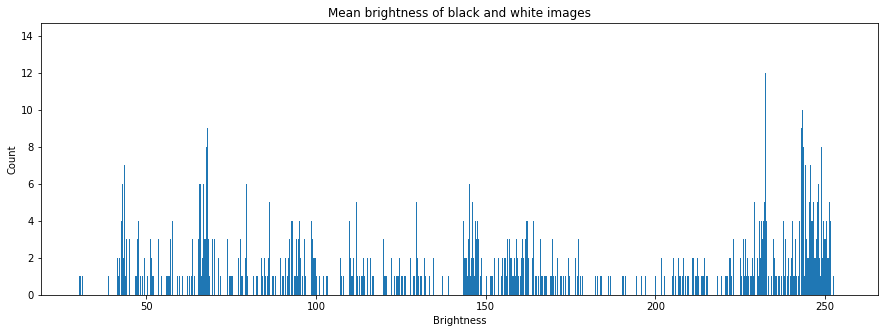

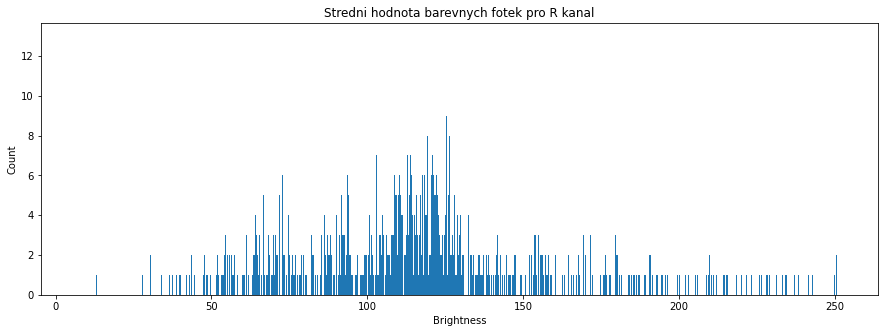

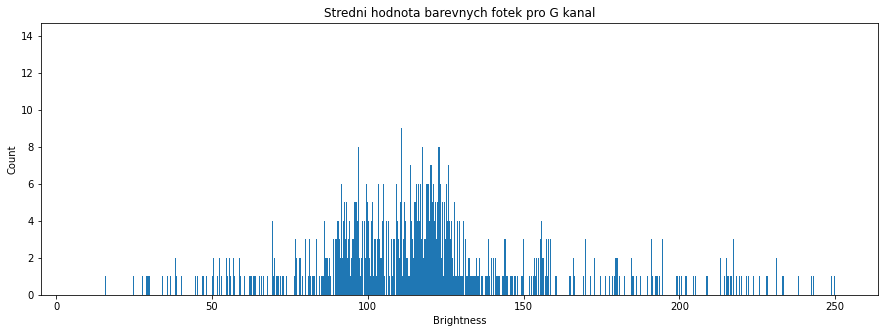

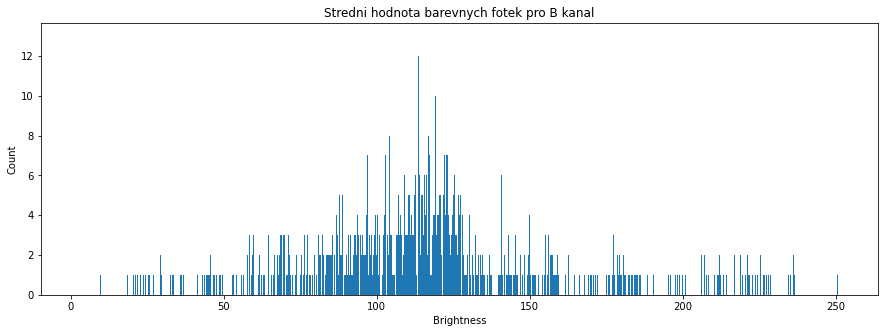

In [34]:
fig = plt.figure(figsize = (15,5))
plt.hist(list_of_av_brightness_GRAY , len(list_of_av_brightness_GRAY))
#print(len(list_of_av_brightness))
plt.xlabel("Brightness" )
plt.ylabel("Count")
plt.title("Mean brightness of black and white images")
plt.show()

fig = plt.figure(figsize = (15,5))
plt.hist(list_of_av_brightness_R , len(list_of_av_brightness_R))
#print(len(list_of_av_brightness))
plt.xlabel("Brightness" )
plt.ylabel("Count")
plt.title("Stredni hodnota barevnych fotek pro R kanal")
plt.show()

fig = plt.figure(figsize = (15,5))
plt.hist(list_of_av_brightness_G , len(list_of_av_brightness_G))
#print(len(list_of_av_brightness))
plt.xlabel("Brightness" )
plt.ylabel("Count")
plt.title("Stredni hodnota barevnych fotek pro G kanal")
plt.show()

fig = plt.figure(figsize = (15,5))
plt.hist(list_of_av_brightness_B , len(list_of_av_brightness_B))
#print(len(list_of_av_brightness))
plt.xlabel("Brightness" )
plt.ylabel("Count")
plt.title("Stredni hodnota barevnych fotek pro B kanal")
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 947.87810259  147.42645707  148.925262    389.71161978   58.71116014
    12.71869829  306.88564074  285.66841331]
 [ 147.42645707  784.97862659  100.09261813   58.17801986  178.84418092
   -82.37405773  315.02794631  422.44341791]
 [ 148.925262    100.09261813  243.40591101   87.32381872   53.43712079
    80.16059937  153.1895569    95.12387387]
 [ 389.71161978   58.17801986   87.32381872 6831.36435926  113.52077588
  -149.58255194  321.98584299  418.00629711]
 [  58.71116014  178.84418092   53.43712079  113.52077588  514.87938959
    67.85254642  230.35098364   23.18964883]
 [  12.71869829  -82.37405773   80.16059937 -149.58255194   67.85254642
  2040.66795367  100.11233683   81.56839493]
 [ 306.88564074  315.02794631  153.1895569   321.98584299  230.35098364
   100.11233683  679.10277625  357.6764111 ]
 [ 285.66841331  422.4434

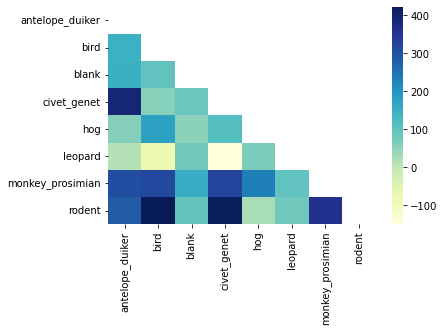

In [19]:
import seaborn as sns
#species_labels # nazvy postupne
mat_of_animal_occurence = np.zeros ((8, pocet_sites))
print(mat_of_animal_occurence)
counter_sites = 0
for key, value in animal_on_trap.items():
    for i in range(8):
        mat_of_animal_occurence[i][counter_sites] = animal_on_trap[key][i]
    counter_sites = counter_sites + 1;

cov_a = np.cov(mat_of_animal_occurence)
mask = np.triu(np.ones_like(cov_a, dtype=bool))
ax = sns.heatmap(cov_a,cmap="YlGnBu", xticklabels = species_labels, yticklabels = species_labels, mask=mask)
print(cov_a)


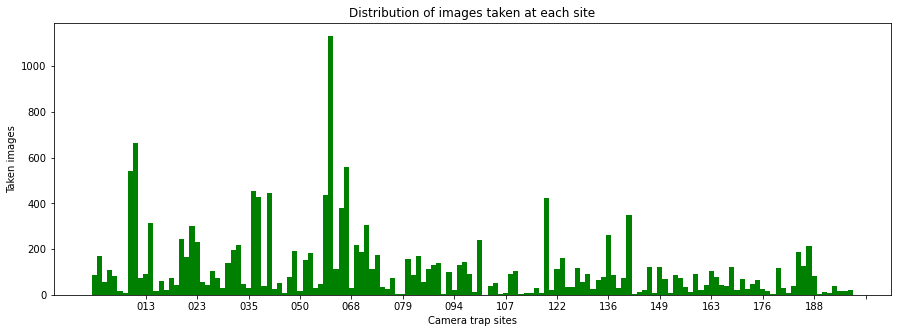

In [33]:
fig = plt.figure(figsize = (15,5))
plt.bar(od.keys(), od.values(), 1, color='g')
plt.xticks([10, 20, 30, 40,50,60,70,80,90,100,110,120,130,140,150])
plt.xlabel("Camera trap sites")
plt.ylabel("Taken images")
plt.title("Distribution of images taken at each site")
plt.show()

Z trénovacích dat, jsou k dispozici informace o tom, kde se nachází fotka její název a také na ktéré fotopasti byla vyfocena:
                             filepath   site
id                                          
ZJ000000  train_features/ZJ000000.jpg  S0120
ZJ000001  train_features/ZJ000001.jpg  S0069
ZJ000002  train_features/ZJ000002.jpg  S0009
ZJ000003  train_features/ZJ000003.jpg  S0008
ZJ000004  train_features/ZJ000004.jpg  S0036 

Z excelu train labels jsou k dizpozici názvy tříd a jejich výskyt na fotkách:
['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent'] 

Poměr živočichů na celém data setu:
monkey_prosimian    2492.0
antelope_duiker     2474.0
civet_genet         2423.0
leopard             2254.0
blank               2213.0
rodent              2013.0
bird                1641.0
hog                  978.0
dtype: float64 

Poměr živočichů jejich procentuální zastoupení:
monkey_prosimian    0.151140
antelope_duiker     0.150049
ci

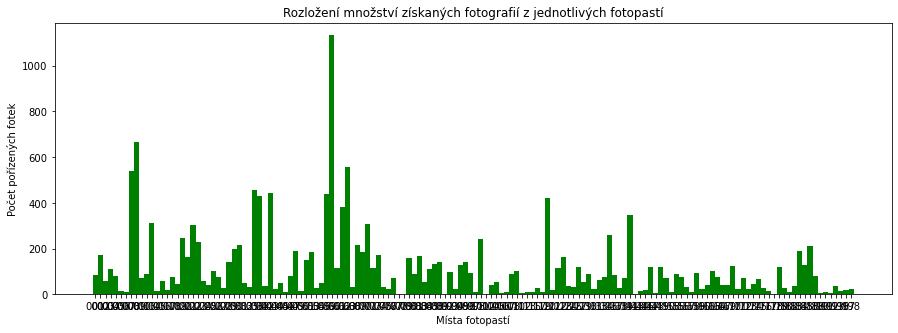

Procentuální mnoství fotek pro každou fotopast: 

[6.0650169820475496e-05, 0.00012130033964095099, 0.00012130033964095099, 0.00012130033964095099, 0.0001819505094614265, 0.0001819505094614265, 0.00024260067928190198, 0.00030325084910237746, 0.00030325084910237746, 0.000363901018922853, 0.0004245511887433285, 0.00048520135856380397, 0.00048520135856380397, 0.0005458515283842794, 0.0005458515283842794, 0.0005458515283842794, 0.0006065016982047549, 0.0006065016982047549, 0.0006065016982047549, 0.0006671518680252305, 0.0006671518680252305, 0.0006671518680252305, 0.000849102377486657, 0.0009097525473071324, 0.0009097525473071324, 0.0009704027171276079, 0.0009704027171276079, 0.0009704027171276079, 0.0010310528869480835, 0.0011523532265890345, 0.0012130033964095099, 0.0012130033964095099, 0.0012736535662299854, 0.001334303736050461, 0.001334303736050461, 0.0013949539058709364, 0.001455604075691412, 0.001455604075691412, 0.0015162542455118874, 0.0015162542455118874, 0.001576904415332363, 0.00

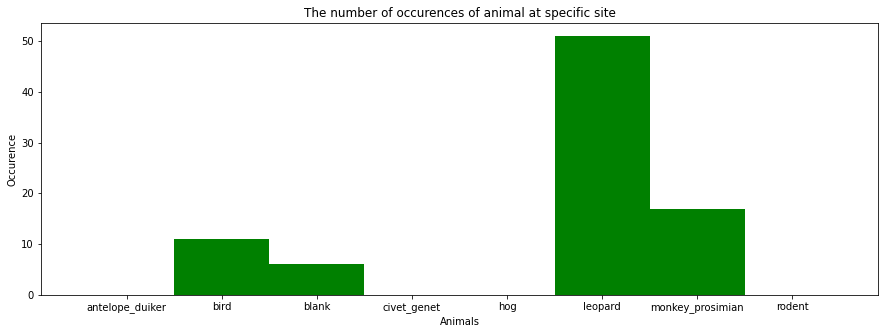

Počet čenobílých fotek:
2197
Počet barevných fotek:
14291
Poměr barevných a černoblých fotek:
[0.13324842309558466, 0.8667515769044153]
Střední hodnota jasu černobílých fotek:
157.11000718422247


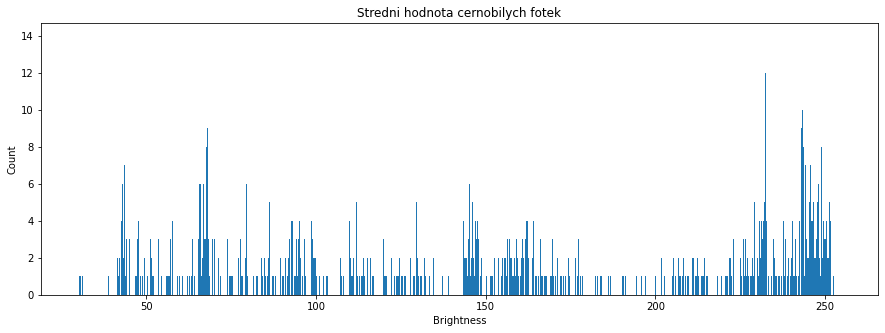

Střední hodnota jasu pro R část barevných fotek:
116.71859320442968


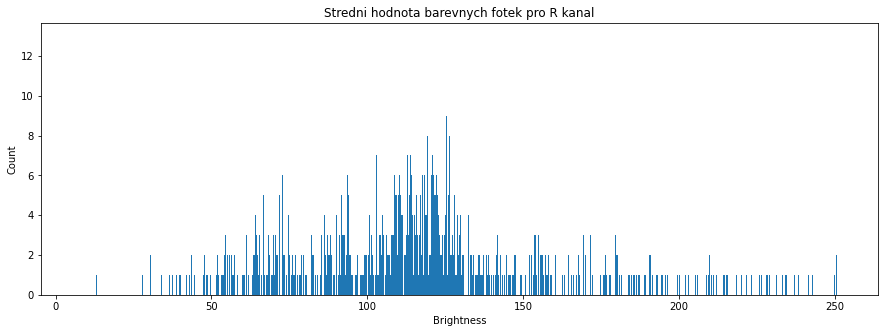

Střední hodnota jasu pro G část barevných fotek:
120.75066613336017


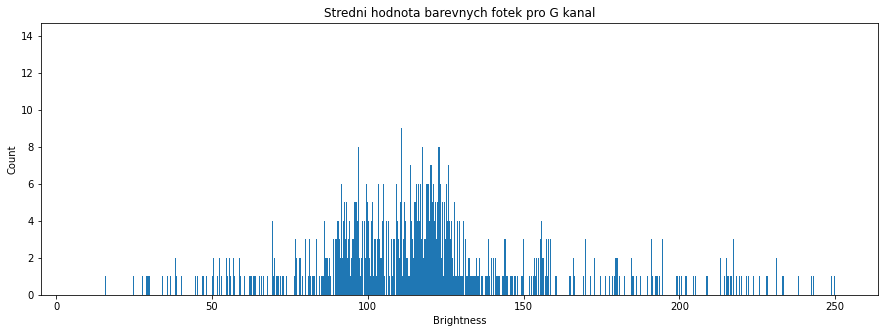

Střední hodnota jasu pro B část barevných fotek:
118.05776160470609


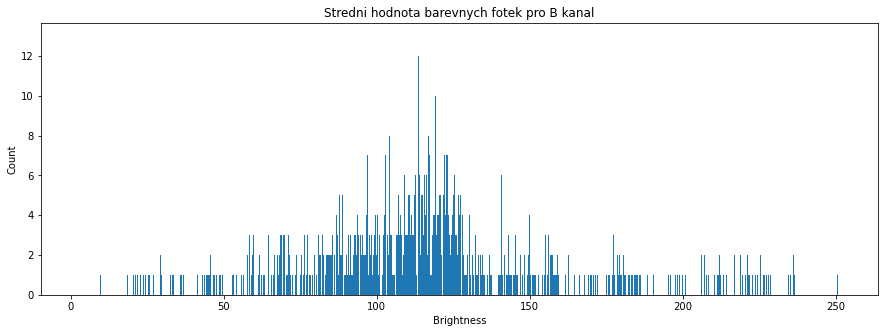

Všechny různé poměry stran pro trénovací dataset:
[1.7777777777777777, 1.9104477611940298, 1.8640776699029127, 1.3333333333333333, 1.6744186046511629, 1.5, 1.6842105263157894]


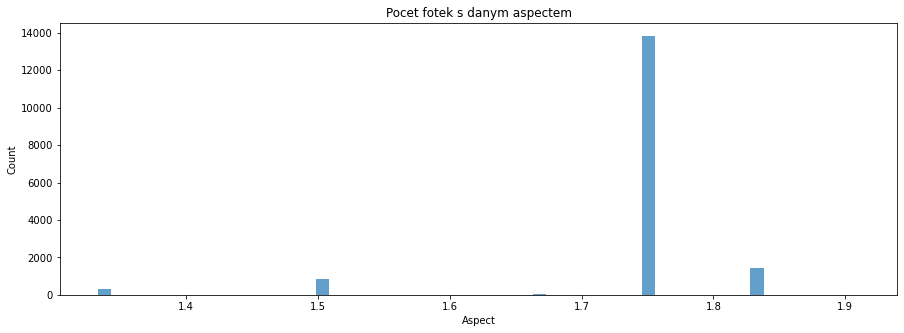

Množství fotek s konkrétním aspectem:
{1.7777777777777777: 13835, 1.9104477611940298: 970, 1.8640776699029127: 458, 1.3333333333333333: 293, 1.6744186046511629: 67, 1.5: 864, 1.6842105263157894: 1} 

Všechny obsažené výšky fotek v datasetu:
[540, 360, 335, 515, 120, 215, 240, 95]


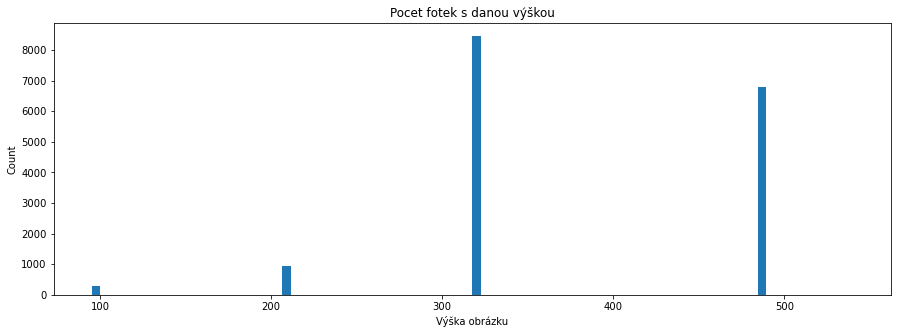

Množství fotek s konkrétní výškou:
{540: 6345, 360: 7490, 335: 970, 515: 458, 120: 293, 215: 67, 240: 864, 95: 1} 

Všechny obsažené šířky fotek v datasetu:
[960, 640, 160, 360]


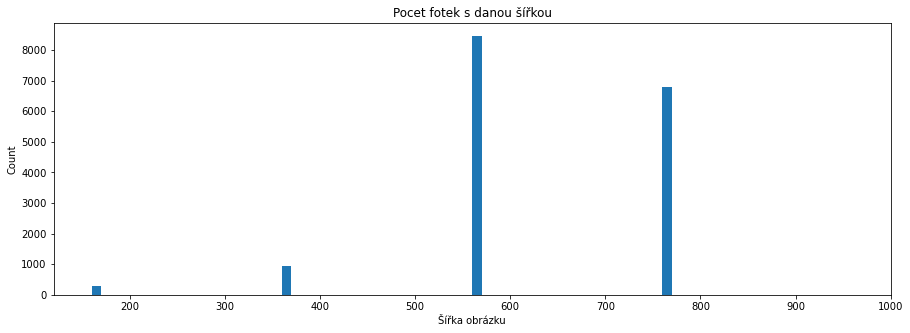

Množství fotek s konkrétní šířkou:
{960: 6803, 640: 8460, 160: 294, 360: 931} 

Kovarianční matice výskytu živočichů:
[[ 947.87810259  147.42645707  148.925262    389.71161978   58.71116014
    12.71869829  306.88564074  285.66841331]
 [ 147.42645707  784.97862659  100.09261813   58.17801986  178.84418092
   -82.37405773  315.02794631  422.44341791]
 [ 148.925262    100.09261813  243.40591101   87.32381872   53.43712079
    80.16059937  153.1895569    95.12387387]
 [ 389.71161978   58.17801986   87.32381872 6831.36435926  113.52077588
  -149.58255194  321.98584299  418.00629711]
 [  58.71116014  178.84418092   53.43712079  113.52077588  514.87938959
    67.85254642  230.35098364   23.18964883]
 [  12.71869829  -82.37405773   80.16059937 -149.58255194   67.85254642
  2040.66795367  100.11233683   81.56839493]
 [ 306.88564074  315.02794631  153.1895569   321.98584299  230.35098364
   100.11233683  679.10277625  357.6764111 ]
 [ 285.66841331  422.44341791   95.12387387  418.00629711   23.

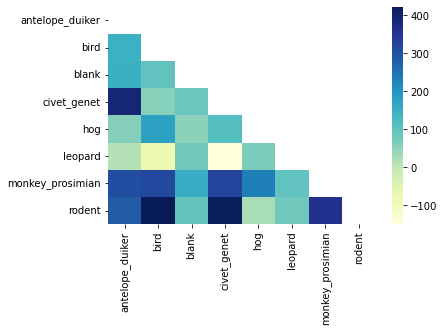

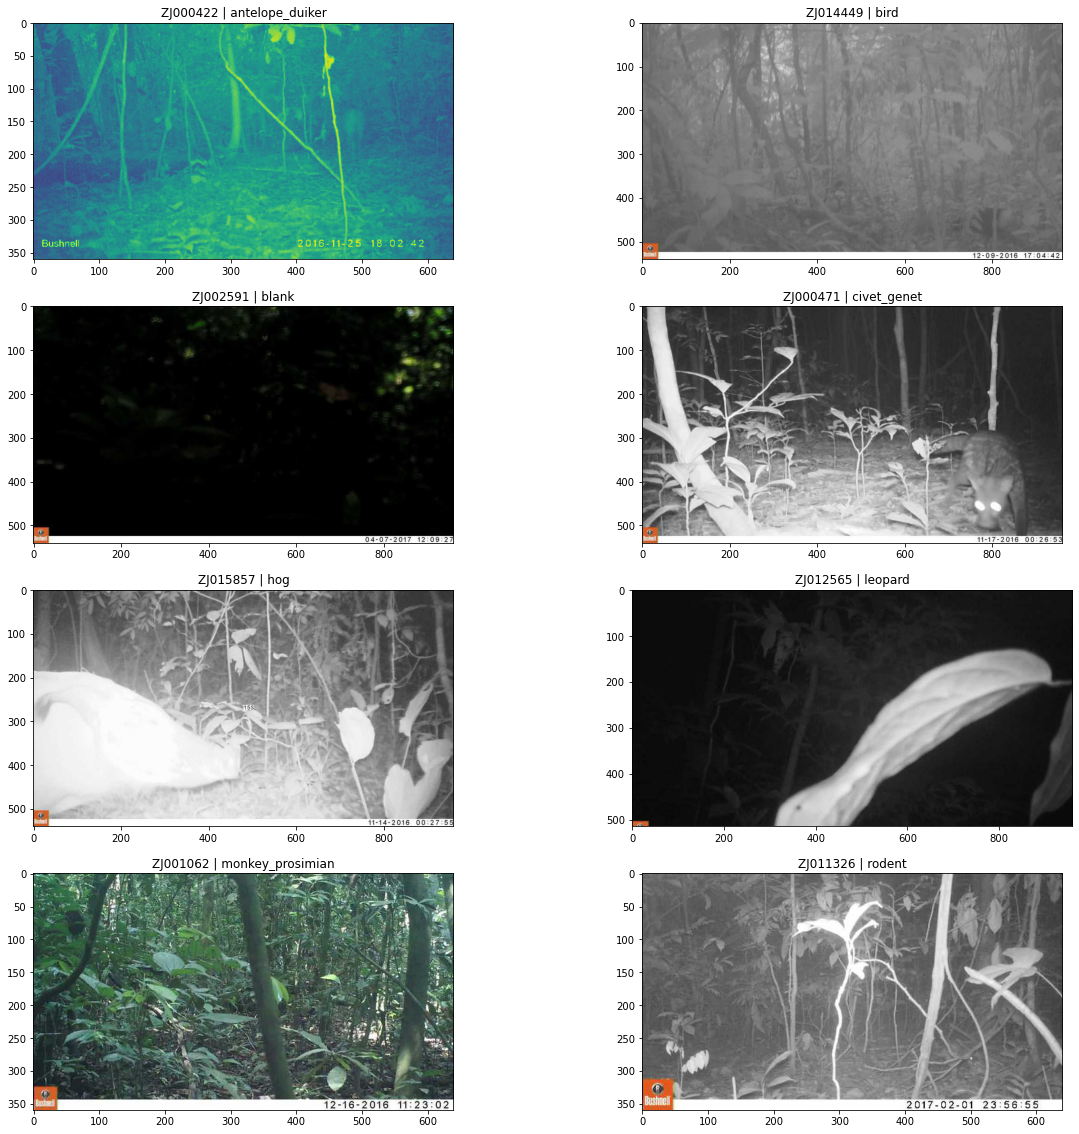

In [17]:
print("Z trénovacích dat, jsou k dispozici informace o tom, kde se nachází fotka její název a také na ktéré fotopasti byla vyfocena:")
print(train_features.head(), "\n")
print("Z excelu train labels jsou k dizpozici názvy tříd a jejich výskyt na fotkách:")
print(species_labels,"\n")


  
print("Poměr živočichů na celém data setu:")
print(train_labels.sum().sort_values(ascending=False),"\n")
print("Poměr živočichů jejich procentuální zastoupení:")
print(train_labels.sum().divide(train_labels.shape[0]).sort_values(ascending=False),"\n")
print("Počet dostupných fotek:")
print(train_features.shape[0])
print("Počet různých fotopastí:")
print(pocet_sites ,"\n")
print("Místa fotopastí a korespondující počet fotek na daném místě:","\n")
print(od)

fig = plt.figure(figsize = (15,5))
plt.bar(od.keys(), od.values(), 1, color='g')
plt.xlabel("Místa fotopastí")
plt.ylabel("Počet pořízených fotek")
plt.title("Rozložení množství získaných fotografií z jednotlivých fotopastí")
plt.show()

print("Procentuální mnoství fotek pro každou fotopast:","\n")
print(sorted(Pomer_fotek_site),"\n")

print("Jednolitvý živočichové vyfoceni na konkrétním místě:")
print("V tomto pořadí:")
print(species_labels)
print(animal_on_trap) 

fig = plt.figure(figsize = (15,5))
plt.bar(species_labels,animal_on_trap['001'], 1, color='g')
plt.xlabel("Animals")
plt.ylabel("Occurence")
plt.title("The number of occurences of animal at specific site")
plt.show()

print("Počet čenobílých fotek:")
print(len(cernobile_id))
print("Počet barevných fotek:")
print(len(barevne_id))
print("Poměr barevných a černoblých fotek:")
print(Pomer_cerno_bar)

print("Střední hodnota jasu černobílých fotek:")
print(sum(list_of_av_brightness_GRAY)/len(list_of_av_brightness_GRAY))
fig = plt.figure(figsize = (15,5))
plt.hist(list_of_av_brightness_GRAY , len(list_of_av_brightness_GRAY))
#print(len(list_of_av_brightness))
plt.xlabel("Brightness" )
plt.ylabel("Count")
plt.title("Stredni hodnota cernobilych fotek")
plt.show()


print("Střední hodnota jasu pro R část barevných fotek:")
print(sum(list_of_av_brightness_R)/len(list_of_av_brightness_R))
fig = plt.figure(figsize = (15,5))
plt.hist(list_of_av_brightness_R , len(list_of_av_brightness_R))
#print(len(list_of_av_brightness))
plt.xlabel("Brightness" )
plt.ylabel("Count")
plt.title("Stredni hodnota barevnych fotek pro R kanal")
plt.show()

print("Střední hodnota jasu pro G část barevných fotek:")
print(sum(list_of_av_brightness_G)/len(list_of_av_brightness_G))
fig = plt.figure(figsize = (15,5))
plt.hist(list_of_av_brightness_G , len(list_of_av_brightness_G))
#print(len(list_of_av_brightness))
plt.xlabel("Brightness" )
plt.ylabel("Count")
plt.title("Stredni hodnota barevnych fotek pro G kanal")
plt.show()

print("Střední hodnota jasu pro B část barevných fotek:")
print(sum(list_of_av_brightness_B)/len(list_of_av_brightness_B))
fig = plt.figure(figsize = (15,5))
plt.hist(list_of_av_brightness_B , len(list_of_av_brightness_B))
#print(len(list_of_av_brightness))
plt.xlabel("Brightness" )
plt.ylabel("Count")
plt.title("Stredni hodnota barevnych fotek pro B kanal")
plt.show()

print("Všechny různé poměry stran pro trénovací dataset:")
print(unique_list_pomer) 

fig = plt.figure(figsize = (15,5))
plt.hist(pomer_stran , len(unique_list_pomer), alpha = 0.7, width = 0.01)
plt.xlabel("Aspect" )
plt.ylabel("Count")
plt.title("Pocet fotek s danym aspectem")
plt.show()

print("Množství fotek s konkrétním aspectem:")
print(pomer_stran_dict,"\n")  

print("Všechny obsažené výšky fotek v datasetu:")
print(unique_list_vyska) 

fig = plt.figure(figsize = (15,5))
plt.hist(pole_vysky , len(unique_list_vyska),width = 5)
plt.xlabel("Výška obrázku" )
plt.ylabel("Count")
plt.title("Pocet fotek s danou výškou")
plt.show()

print("Množství fotek s konkrétní výškou:")
print(pocet_vysky_dict,"\n") 

print("Všechny obsažené šířky fotek v datasetu:")
print(unique_list_sirka) 

fig = plt.figure(figsize = (15,5))
plt.hist(pole_sirky , len(unique_list_sirka),width = 10)
plt.xlabel("Šířka obrázku" )
plt.ylabel("Count")
plt.title("Pocet fotek s danou šířkou")
plt.show()

print("Množství fotek s konkrétní šířkou:")
print(pocet_sirky_dict,"\n") 

print("Kovarianční matice výskytu živočichů:")
print(cov_a)

print("Heatmap kovariance živočichů:")
ax = sns.heatmap(cov_a,cmap="YlGnBu", xticklabels = species_labels, yticklabels = species_labels, mask=mask)




print("Vykreslení 8 náhodných fotek pro ilustraci:")
import matplotlib.image as mpimg

random_state = 50

# we'll create a grid with 8 positions, one for each label (7 species, plus blanks)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# iterate through each species
for species, ax in zip(species_labels, axes.flat):
    # get an image ID for this species
    img_id = (train_labels[train_labels.loc[:,species] == 1].sample(1, random_state=random_state).index[0])
    # reads the filepath and returns a numpy array
    img = mpimg.imread(train_features.loc[img_id].filepath)
    # plot etc
    ax.imshow(img)
    ax.set_title(f"{img_id} | {species}")

[1, 1, 6, 5, 4, 3, 0, 5, 1, 5, 5, 6, 2, 6, 5, 1, 2, 6, 5, 6, 0, 6, 7, 6, 6, 6, 2, 0, 6, 4, 3, 6, 3, 0, 3, 2, 5, 0, 3, 2, 5, 6, 6, 0, 7, 2, 4, 5, 7, 3, 6, 6, 1, 2, 2, 5, 2, 0, 3, 0, 3, 2, 1, 4, 3, 1, 3, 7, 0, 1, 6, 1, 3, 2, 3, 5, 1, 0, 6, 5, 1, 3, 0, 7, 5, 5, 0, 5, 2, 0, 5, 6, 2, 5, 2, 5, 4, 2, 0, 3, 1, 3, 3, 6, 5, 7, 0, 1, 7, 0, 5, 1, 7, 0, 3, 3, 4, 3, 3, 0, 5, 3, 0, 2, 2, 7, 2, 0, 7, 7, 7, 3, 0, 7, 1, 2, 3, 7, 5, 1, 1, 6, 2, 5, 1, 2, 7, 0, 6, 2, 6, 1, 5, 3, 6, 5, 2, 2, 6, 7, 5, 0, 0, 5, 1, 1, 2, 6, 2, 0, 7, 6, 3, 7, 2, 7, 0, 1, 7, 0, 0, 5, 6, 0, 7, 3, 7, 4, 2, 0, 7, 3, 7, 7, 6, 0, 5, 6, 1, 6, 3, 5, 5, 5, 0, 0, 3, 2, 1, 6, 6, 6, 7, 1, 2, 5, 0, 6, 2, 3, 5, 6, 6, 7, 0, 6, 6, 1, 2, 7, 3, 7, 7, 5, 0, 2, 1, 3, 5, 2, 0, 7, 3, 1, 2, 7, 7, 0, 7, 6, 7, 5, 6, 2, 6, 3, 2, 6, 7, 7, 3, 0, 4, 6, 6, 6, 6, 1, 7, 5, 6, 6, 0, 1, 6, 3, 5, 6, 7, 4, 5, 0, 2, 0, 1, 3, 5, 6, 0, 2, 0, 1, 6, 6, 5, 2, 4, 2, 3, 0, 3, 3, 0, 6, 5, 7, 7, 4, 2, 7, 5, 0, 2, 2, 7, 6, 7, 5, 7, 5, 3, 1, 2, 0, 4, 5, 1, 0, 7, 5, 4, 1, 0, 

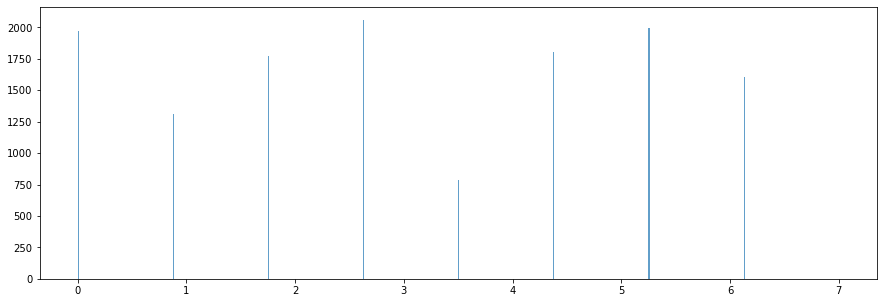

In [49]:
from sklearn.model_selection import StratifiedGroupKFold
sgkf = StratifiedGroupKFold(n_splits=5)
# print(list_of_sites)
# print(list_of_ids)
list_of_class_numbers = []
train_labels.head()
counterr = 0
for row in train_labels.itertuples(index=False):
    for a,b in enumerate(row):
        if b == 1.0:
            list_of_class_numbers.append(counterr)
        counterr = counterr + 1
    counterr = 0

x = list_of_ids
y = list_of_class_numbers
groups = list_of_sites
train_fold = [[],[],[],[],[]]
test_fold = [[],[],[],[],[]]
counter = 0;
for train, test in sgkf.split(x, y, groups=groups):
    train_fold[counter] = train
    test_fold[counter] = test
    counter = counter+1